# Regression with Python

In [19]:
# Import cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import joblib 
import pickle 
from sklearn.preprocessing import PolynomialFeatures

# I- Linear Regression

In [20]:
# Loading dataset cell
dataset1 = pd.read_csv(r"C:\Users\kille\Downloads\Salary_Data.csv")

In [21]:
dataset1.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [22]:
dataset1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


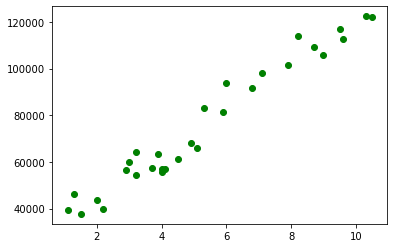

In [23]:
plt.scatter(dataset1['YearsExperience'],dataset1['Salary'],color = "green")

In [24]:
x = dataset1.iloc[:,0:1].values
y = dataset1.iloc[:,1:2].values

In [25]:
x.shape

(30, 1)

In [26]:
y.shape

(30, 1)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [28]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred =  lr.predict(x_test)

In [30]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [31]:
y_test

array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.]])

In [32]:
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [33]:
accuracy = r2_score(y_test,y_pred)
accuracy

0.988169515729126

In [34]:
y = lr.predict([[12]])
y

array([[138531.00067138]])

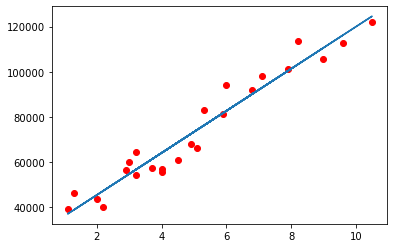

In [35]:
plt.scatter(x_train,y_train, color ='red')
plt.plot(x_train,lr.predict(x_train))

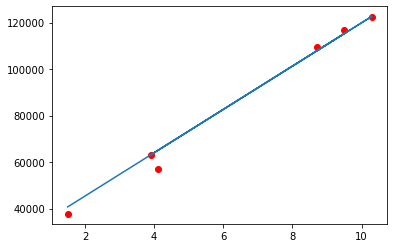

In [36]:
plt.scatter(x_test,y_test, color ='red')
plt.plot(x_test,y_pred)

# II- Multilinear Regression

In [37]:
#Loading dataset cell
dataset2 = pd.read_csv(r"C:\Users\kille\Downloads\50_Startups.csv")

In [38]:
dataset2.isnull().any()

R&D Spend          False
Administration      True
Marketing Spend     True
State              False
Profit             False
dtype: bool

In [39]:
dataset2["Administration"].fillna(dataset2["Administration"].mean(),inplace = True)
dataset2["Marketing Spend"].fillna(dataset2["Marketing Spend"].mean(),inplace = True)

In [40]:
dataset2.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [41]:
dataset2.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121564.038163,212725.266735,112012.639200
std,45902.256482,27974.818762,121697.951409,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,135028.207500,90138.902500
50%,73051.080000,122699.795000,213680.038367,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


C:\Users\kille\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administration'>

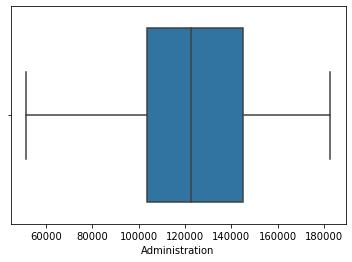

In [42]:
sns.boxplot(dataset2["Administration"])

In [43]:
v = dataset2.iloc[:,0:4].values
w = dataset2.iloc[:,4:5].values

In [44]:
dataset2["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [45]:
ct = ColumnTransformer([("oh",OneHotEncoder(),[3])],remainder = "passthrough")
v = ct.fit_transform(v)
v

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 212725.26673469393],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 121564.03816326526, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 9

In [46]:
joblib.dump(ct,"column")

['column']

In [47]:
v_train,v_test,w_train,w_test = train_test_split(v,w,test_size = 0.2,random_state = 0)

In [48]:
multilinear = LinearRegression()
multilinear.fit(v_train,w_train)

LinearRegression()

In [49]:
w_pred = multilinear.predict(v_test)

In [50]:
w_pred

array([[102878.005919  ],
       [132270.25447715],
       [132633.73140009],
       [ 72126.02121902],
       [178331.50603372],
       [116426.57493054],
       [ 68171.67631541],
       [ 98737.38840559],
       [114057.16028014],
       [167719.48557511]])

In [51]:
w_test

array([[103282.38],
       [144259.4 ],
       [146121.95],
       [ 77798.83],
       [191050.39],
       [105008.31],
       [ 81229.06],
       [ 97483.56],
       [110352.25],
       [166187.94]])

In [52]:
accuracy = r2_score(w_test,w_pred)
accuracy

0.9344508898504107

In [53]:
pickle.dump(multilinear,open('profit.pkl','wb'))

In [54]:
yp = multilinear.predict([[1,0,0,12345,12345,3456]])
yp

array([[52470.96807739]])

In [55]:
new = joblib.load('column')

In [56]:
p = new.transform([[1645,2567,6787,"Florida"]])
p

array([[0.0, 1.0, 0.0, 1645, 2567, 6787]], dtype=object)

In [57]:
y1 = multilinear.predict(p)
y1

array([[43277.23627491]])

In [58]:
y2 = multilinear.predict(new.transform([[12345,56789,12345,"California"]]))
y2

array([[54267.44556093]])

In [59]:
y3 = multilinear.predict(new.transform([[1234567,4568987,2345,"New York"]]))
y3

array([[1141417.50251239]])

# III- Polynomial Regression

In [60]:
dataset3 = pd.read_csv(r"C:\Users\kille\Downloads\Position_Salaries.csv")

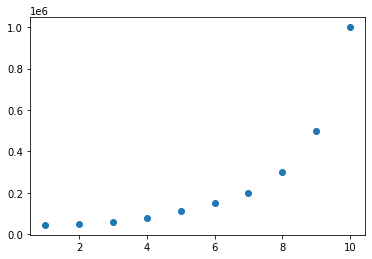

In [61]:
plt.scatter(dataset3["Level"],dataset3["Salary"])

In [62]:
a = dataset3.iloc[:,1:2].values
z = dataset3.iloc[:,2:3].values

In [63]:
poly_reg = PolynomialFeatures(degree = 4)
a_poly = poly_reg.fit_transform(a)

In [64]:
poly_reg.fit(a_poly,z)

PolynomialFeatures(degree=4)

In [65]:
pr = LinearRegression()
pr.fit(a_poly , z)

LinearRegression()

In [66]:
pr_pred = pr.predict(a_poly)

In [67]:
pr_pred

array([[ 53356.64335681],
       [ 31759.90675996],
       [ 58642.19114221],
       [ 94632.86713289],
       [121724.94172498],
       [143275.05827508],
       [184003.49650349],
       [289994.17249411],
       [528694.63869452],
       [988916.08391594]])

In [68]:
z

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

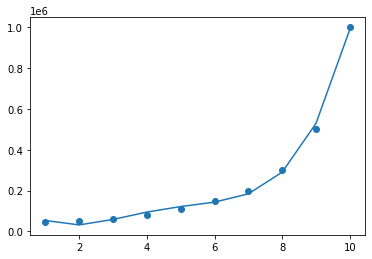

In [69]:
plt.scatter(a,z)
plt.plot(a,pr_pred)

In [70]:
z1 = pr.predict(poly_reg.fit_transform([[11]]))
z1

array([[1780833.33333322]])